## Graded Challenge 2

#### Context
- Predict next-day rain by training classification models on the target variable RainTomorrow.

#### Content
- This dataset contains about 10 years of daily weather observations from many locations across Australia.

- RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

#### Objective
Graded Challenge 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:

- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Predict Tommorow will be rain or no using Logistic Regression and SVM

### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("weatherAUS.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (145460, 23)


### Data Cleaning

##### Drop Columns

In [6]:
df.count().sort_values

<bound method Series.sort_values of Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64>

In [7]:
# Dapat dilihat 4 kolom pertama mempunyai sekitar 60% data, maka kita abaikan saja 4 kolomnya
# Drop kolom yang tidak terpakai
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm',
                      'Cloud9am','Date'],axis=1)

##### Missing Values

In [8]:
# Melihat apakah ada missing value atau tidak
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
# Menghilangkan semua nilai null
df = df.dropna(how='any')

In [10]:
# Mengecek kembali missing value
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Sudah tidak ada missing value pada dataset

In [11]:
# Mengganti categorical columns (RainToday) dan RainTomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

##### Numerical and Categorical

In [12]:
#Numeric columns
num = df.select_dtypes(exclude="object")
print(num.columns)
print("")
print("Total Numerical Columns : " , len(num.columns))
print("-------------------------------------------------")


#Categorical columns
cat = df.select_dtypes(include="object")
print(cat.columns)
print("")
print("Total Categorical Columns : " , len(cat.columns))

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Total Numerical Columns :  14
-------------------------------------------------
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

Total Categorical Columns :  4


Dapat dikatakan bahwa kita memiliki **12 Numerical Columns** dan **7 Categorical Columns** , yang menjadi target pada kolom diatas yaitu **RainTomorrow**.

### Exploratory Data Analysis

##### Correlation

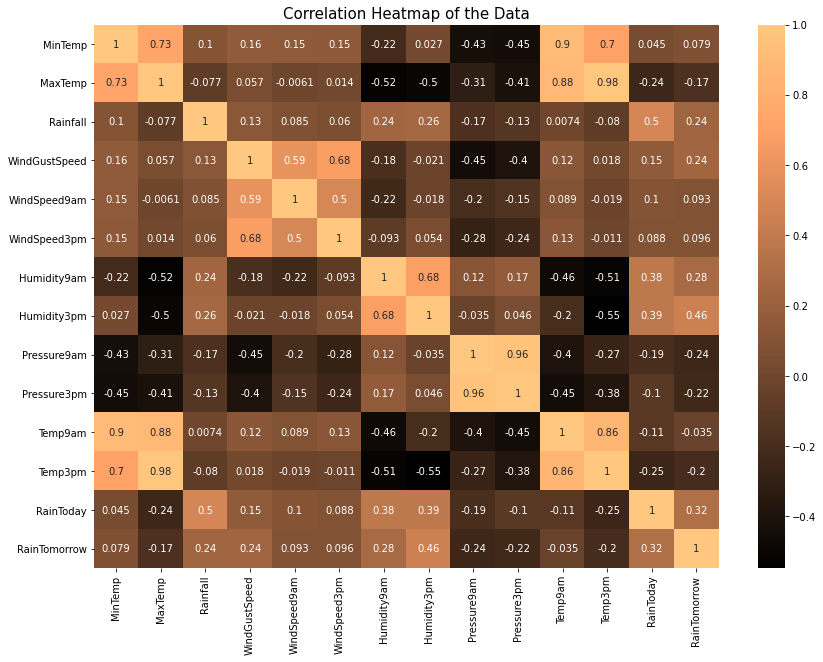

In [13]:
# lets check the Correlation Heat Map of the Data
plt.figure(figsize = (14, 10))

sns.heatmap(df.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Dapat disimpulkan dari korealsi diatas bahwa ada beberapa yang memiliki korealsi sedang dengan **Rain Tomorrow** seperti:
- WindGustSpeed
- Humidity3pm
- Pressure9am
- Pressure3pm
- RainToday

Kita akan melihat distribusi dari kolom numerical.

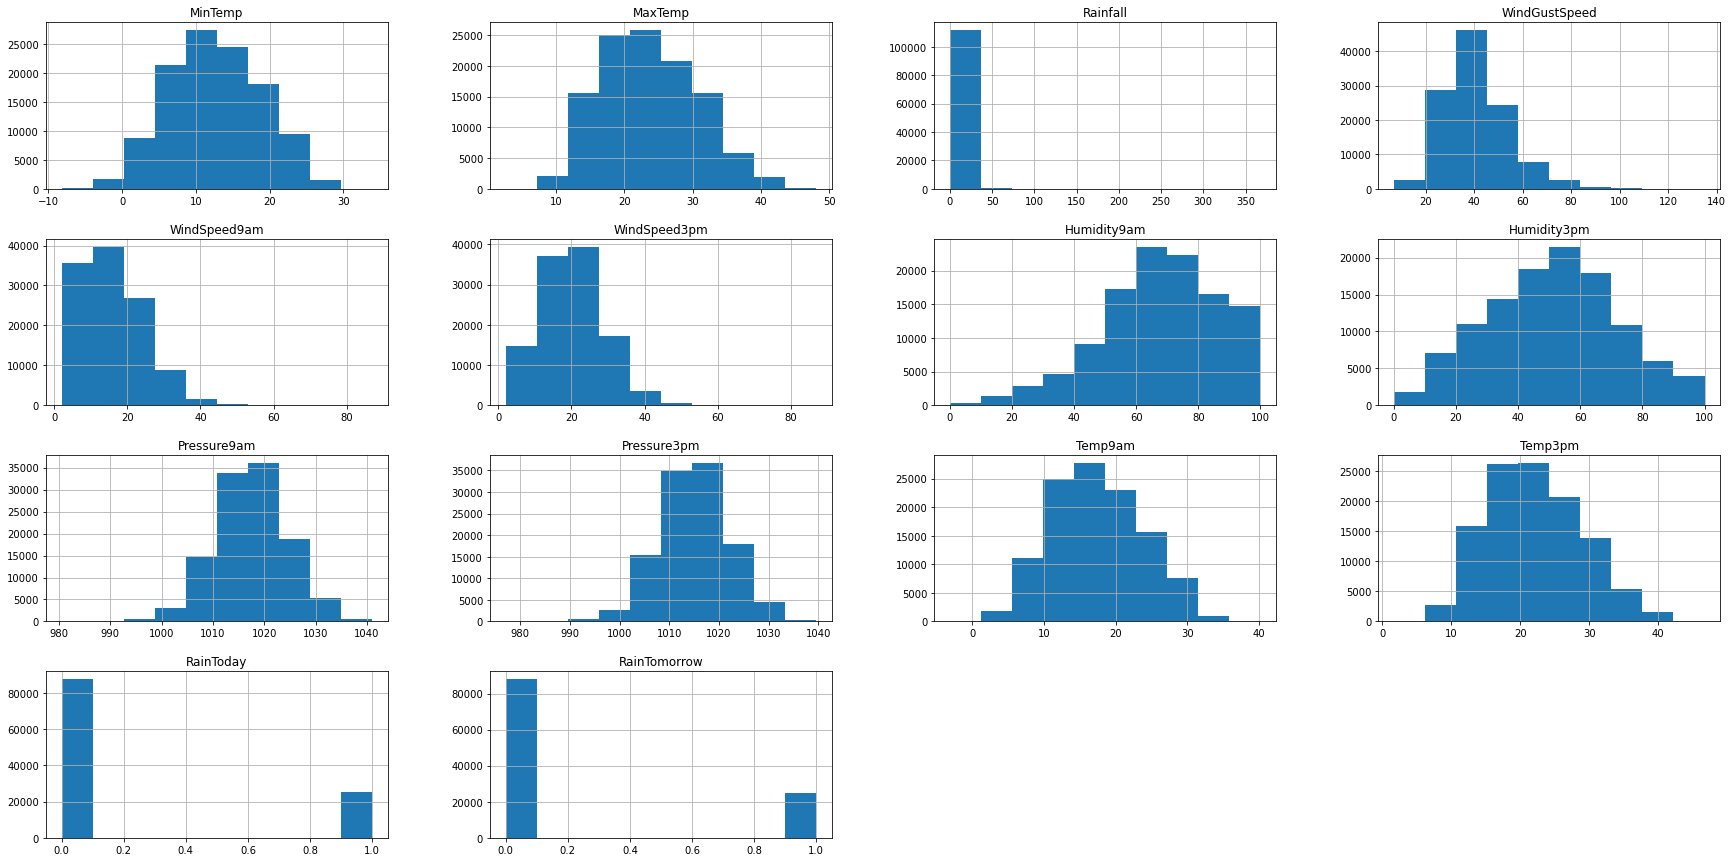

In [14]:
#Create histogram
fig = plt.figure(figsize = (30,15));
ax = fig.gca();
num.hist(ax = ax);

Dari atas, kita bisa melihat ***MinTemp***, ***MaxTemp***, ***Humidity3pm***, ***Pressure9am***, ***Pressure3pm***, ***Temp9am***, dan ***Temp3pm***, cenderung berdistribusi normal.

Sedangkan ***Rainfall***, ***WindGustSpeed***, ***WindSpeed9am***, ***WindSpeed3am***,  dan ***Humidity9am*** memiliki data miring yang menunjukkan bahwa ini memiliki variasi data yang tinggi.

#####  Location vs Rainfall

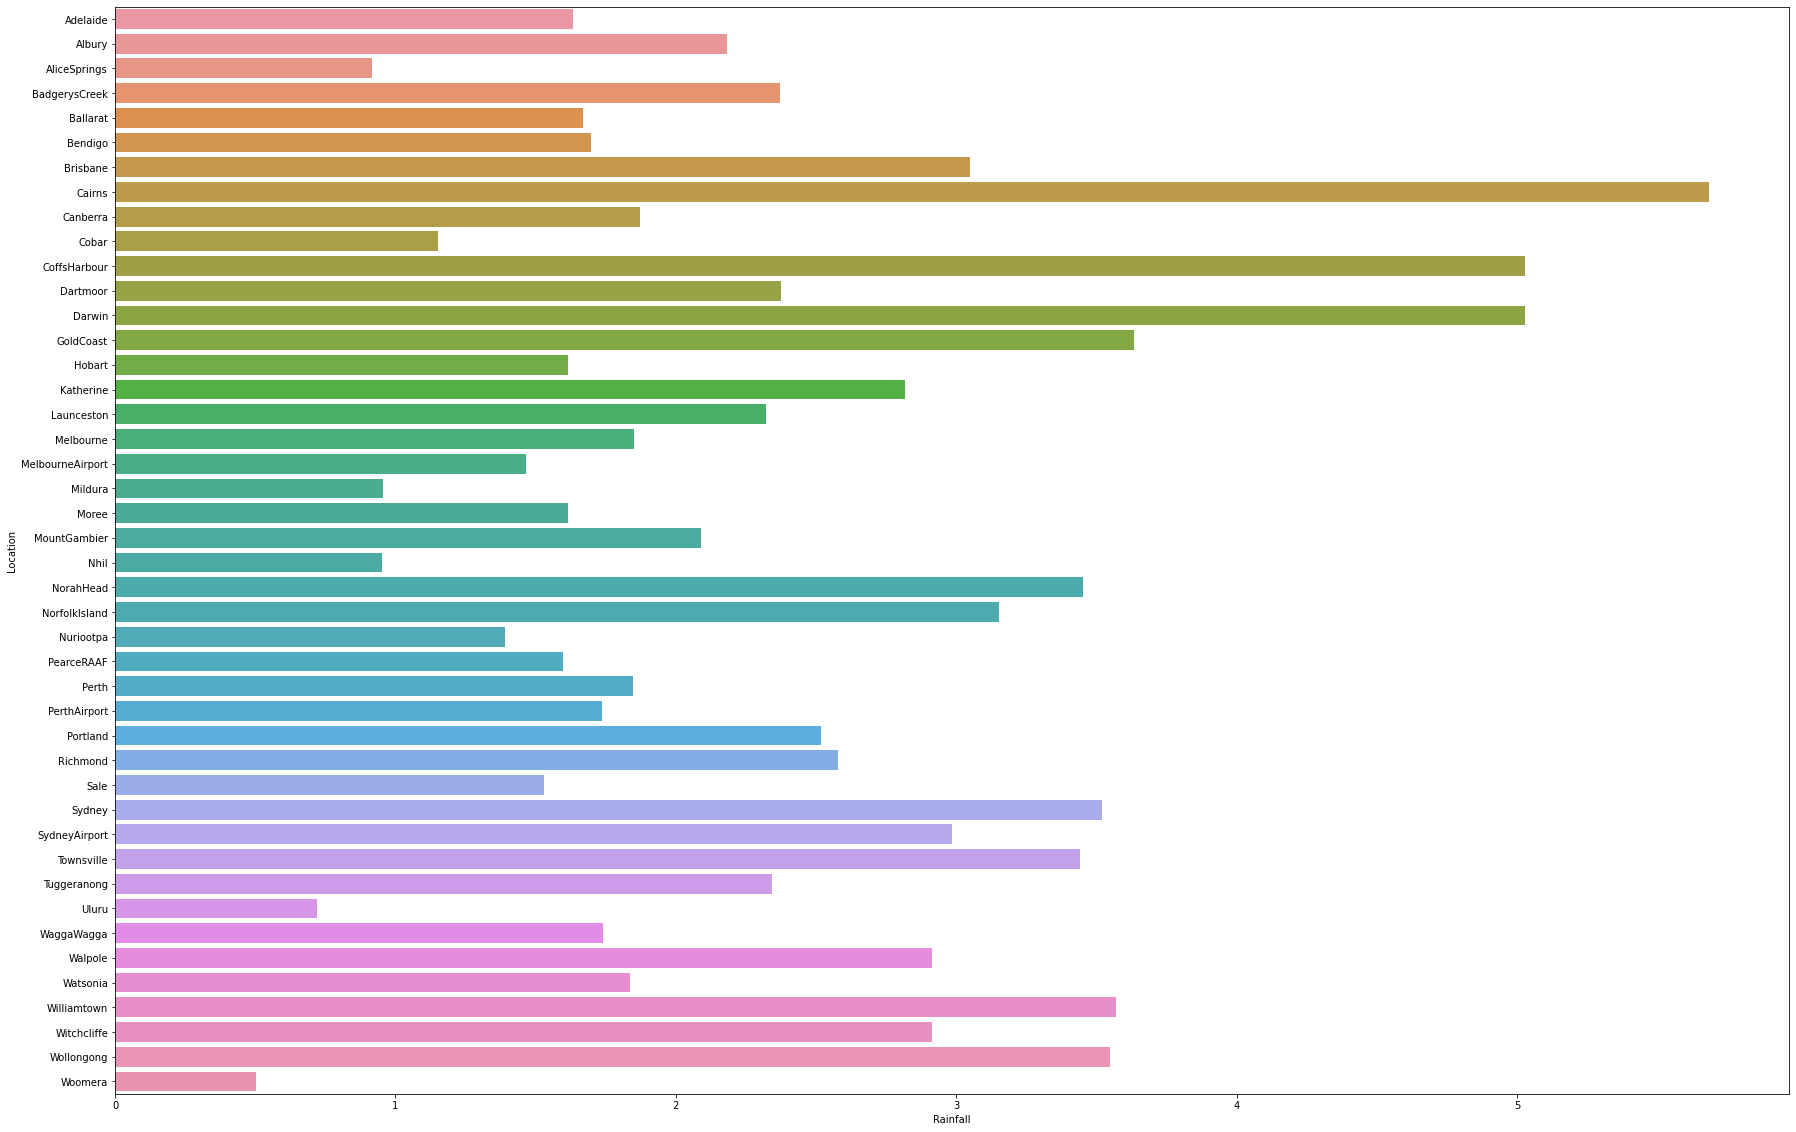

In [15]:
# Rainfall
rain = df.groupby(["Location"])["Rainfall"].mean().reset_index()

#Graph
plt.figure(figsize=(30,20));
sns.barplot(data = rain  , x="Rainfall", y="Location");

Dapat dilihat dari grafik diatas bahwa daerah yang memiliki curah hujan tertinggi di **Cairns**, sedangkan yang memiliki curah hujan ter-rendah di **Woomera**.

##### Location vs RainTommorow & RainToday

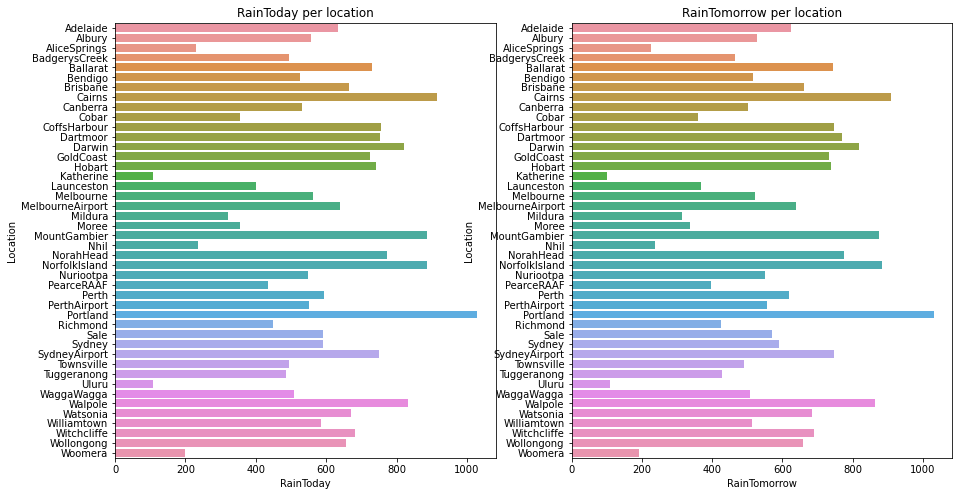

In [16]:
loc1 = df.groupby('Location')[['RainTomorrow']].sum().reset_index()
loc2 = df.groupby('Location')[['RainToday']].sum().reset_index()
loc1['RainToday'] = loc2['RainToday']
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title('RainToday per location')
sns.barplot(x="RainToday", y="Location", data=loc2)

plt.subplot(1,2,2)
plt.title('RainTomorrow per location')
sns.barplot(x="RainTomorrow", y="Location", data=loc1)

plt.show()

Pada *RainToday* dan *RainTomorrow* yang memiliki curah hujan hari ini dan besok paling tinggi yaitu di **Portland** dan yang paling rendah yaitu di **Uluru**.

### Data Pre-Processing
##### Drop and Labelling

In [17]:
# Menghilangkan kolom yang tidak terpakai
df = df.drop(columns=['Location'],axis=1)

In [18]:
#Melihat unique values dan merubahnya ke int 
a = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in a:
    print(np.unique(df[col]))

# Labelling
df['WindGustDir'] = df.WindGustDir.astype("category").cat.codes
df['WindDir3pm'] = df.WindDir3pm.astype("category").cat.codes
df['WindDir9am'] = df.WindDir9am.astype("category").cat.codes

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [19]:
for col in a:
    print(np.unique(df[col]))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


Merubah Categorical menjadi interger:
- E = 0
- ENE = 1
- ESE = 2
- N = 3
- NE =  4
- NNE = 5
- NNW =  6
- NW  =  7
- S  = 8
- SE  = 9
- SSE =  10
- SSW =  11
- SW  = 12
- W   = 13
- WNW = 14
- WSW = 15

##### Normalize the dataset

In [20]:
# Standaridzed data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

df1 = pd.DataFrame(scaler.transform(df), 
                  index=df.index, columns=df.columns)
df1

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.513064,0.446154,0.001632,0.866667,0.289062,0.866667,0.933333,0.211765,0.258824,0.71,0.22,0.449587,0.4800,0.461894,0.446667,0.0,0.0
1,0.370546,0.494505,0.000000,0.933333,0.289062,0.400000,1.000000,0.023529,0.235294,0.44,0.25,0.497521,0.4912,0.468822,0.502222,0.0,0.0
2,0.501188,0.507692,0.000000,1.000000,0.304688,0.866667,1.000000,0.200000,0.282353,0.38,0.30,0.447934,0.5056,0.556582,0.477778,0.0,0.0
3,0.413302,0.558242,0.000000,0.266667,0.132812,0.600000,0.000000,0.105882,0.082353,0.45,0.16,0.613223,0.5712,0.489607,0.551111,0.0,0.0
4,0.610451,0.652747,0.002720,0.866667,0.265625,0.066667,0.466667,0.058824,0.211765,0.82,0.33,0.500826,0.4624,0.482679,0.622222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.277910,0.421978,0.000000,0.000000,0.187500,0.133333,0.000000,0.152941,0.129412,0.59,0.27,0.730579,0.7056,0.288684,0.426667,0.0,0.0
145455,0.261283,0.457143,0.000000,0.000000,0.187500,0.600000,0.066667,0.129412,0.105882,0.51,0.24,0.728926,0.6912,0.304850,0.460000,0.0,0.0
145456,0.280285,0.498901,0.000000,0.400000,0.117188,0.600000,0.200000,0.129412,0.082353,0.56,0.21,0.710744,0.6720,0.323326,0.506667,0.0,0.0
145457,0.323040,0.534066,0.000000,0.200000,0.234375,0.600000,0.933333,0.082353,0.082353,0.53,0.24,0.669421,0.6352,0.360277,0.542222,0.0,0.0


##### Select the best Feature

In [21]:
# Untuk memberi informasi tentang top fitur
a = df1.loc[:,df1.columns!='RainTomorrow']
b = df1[['RainTomorrow']]

# SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
selector.fit(a, b)
a_new = selector.transform(a)
print(a.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'RainToday'], dtype='object')


Saya hanya mengambil 5 top fitur yaitu:
- Rainfall
- WindGustSpeed
- Humidity9am
- Humidity3pm
- RainToday

In [22]:
# Buat tabel baru untuk top fitur
df_new = df1[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'RainToday','RainTomorrow']]
df_new.head()

,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,RainToday,RainTomorrow
0,0.001632,0.289062,0.71,0.22,0.0,0.0
1,0.000000,0.289062,0.44,0.25,0.0,0.0
2,0.000000,0.304688,0.38,0.30,0.0,0.0
3,0.000000,0.132812,0.45,0.16,0.0,0.0
4,0.002720,0.265625,0.82,0.33,0.0,0.0


In [23]:
# Standaridzed data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_new)

StandardScaler()

In [24]:
# Mendefinisikan X dan y
X = df_new.drop(columns=['RainTomorrow'])
y = df_new['RainTomorrow']

In [29]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

Accuracy of Logistic Regression: 84.14310171792904 

confusion matrix
[[24973  1316]
 [ 4056  3533]]


              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     26289
         1.0       0.73      0.47      0.57      7589

    accuracy                           0.84     33878
   macro avg       0.79      0.71      0.74     33878
weighted avg       0.83      0.84      0.83     33878

AUC Score :  0.7077416360784254


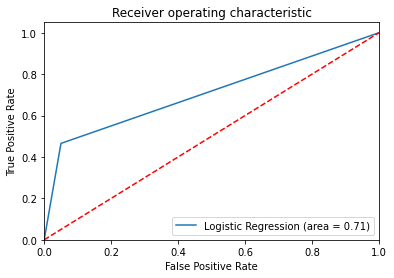

0.5680977649139732


In [37]:
# Mendefinisikan LogisticRegression dan fitting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

# Define and fit
lr=LogisticRegression()
lr.fit(X_train,y_train)

# Predict
pred_lr=lr.predict(X_test)

# Accuracy Score
lr_acc_score = accuracy_score(y_test, pred_lr)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

# Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, pred_lr)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,pred_lr))

#ROC Curve
lr_roc = roc_auc_score(y_test, pred_lr)
print("AUC Score : ", lr_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_lr)
plt.figure()
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % lr_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_lr))

Dari hasil diatas dapat dikatakan sebagai berikut:

Logistic Regression memiliki kemampuan tinggi untuk menghasilkan **besok tidak hujan** dengan nilai Precision 0.86 , nilai Recall 0.95 dan nilai F1-Score 0.90 (hampir sempurna).

Tetapi memiliki kemampuan yang buruk untuk menghasilkan **besok hujan** dengan nilai Precision 0,73, nilai Recall 0,47, nilai F1-Score 0,56

Jadi, Logistic Regression memiliki akurasi yang cukup baik yaitu 0,84 dan probabilitas yang cukup untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,71

### SVM Classifier

Accuracy of RVC: 84.06045221087432 

confusion matrix
[[25185  1104]
 [ 4296  3293]]


              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90     26289
         1.0       0.75      0.43      0.55      7589

    accuracy                           0.84     33878
   macro avg       0.80      0.70      0.73     33878
weighted avg       0.83      0.84      0.82     33878

AUC Score :  0.6959613807662631


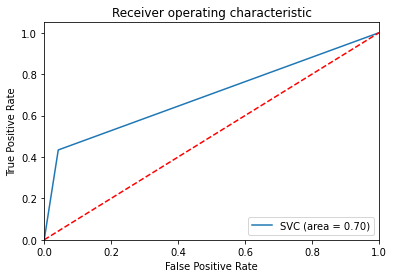

0.549474386784582


In [39]:
from sklearn.svm import SVC

# Kernel = Linear dan C = 1
svc= SVC(kernel='linear',C=1)
svc.fit(X_train,y_train)

# Predict
pred_svc = svc.predict(X_test)

# Accuracy Score
svc_acc_score = accuracy_score(y_test, pred_svc)
print("Accuracy of RVC:",svc_acc_score*100,'\n')

# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test, pred_svc)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_svc))

#ROC Curve
svc_roc = roc_auc_score(y_test, pred_svc)
print("AUC Score : ", svc_roc)
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_svc)
plt.figure()
plt.plot(fpr1, tpr1, label='SVC (area = %0.2f)' % svc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC')
plt.show()

from sklearn.metrics import f1_score
print(f1_score(y_test, pred_svc))

Dari hasil diatas dapat dikatakan sebagai berikut:

SVC memiliki kemampuan tinggi untuk menghasilkan **besok tidak hujan** dengan nilai Precision 0.85 , nilai Recall 0.96 dan nilai F1-Score 0.90 (hampir sempurna).

Tetapi memiliki kemampuan yang buruk untuk menghasilkan **besok hujan** dengan nilai Precision 0,75, nilai Recall 0,43, nilai F1-Score 0,55

Jadi, SVC memiliki akurasi yang cukup baik yaitu 0,84 dan probabilitas yang cukup untuk menghasilkan matriks kebingungan dari masing-masing treshold yang hanya 0,70.

#### Kesimpulan dari kedua model

Kita dapat simpulkan dari hasil diatas:

- Logistic Regression memiliki Precision,Recall yang lebih baik dari SVC, dan memiliki F1-Score yang sama dengan SVC dalam memprediksi Besok tidak hujan dan tidak hujan.
- Kedua model memiliki nilai akurasi yang sama yaitu = 0.84
- Logistic Regression memiliki probabilitas dengan nilai AUC (0,70) yang lebih baik daripada nilai SVC (0,69).

Jadi, bisa dikatakan bahwa Logistic Regression adalah model yang terbaik untuk digunakan.

### Model Inference

In [45]:
# New data 
new_data = [[0.001893, 0.302938, 0.33, 0.15, 0.0]]

#Predict 
predict = lr.predict(new_data)

print("Hasil Klasifikasi model Logistic Regression : \n")
print('RainTomorrow {}'.format(predict))

Hasil Klasifikasi model Logistic Regression : 

RainTomorrow [0.]


### Kesimpulan

- Dilihat dari nilai Precision, Recall dan F1-Score Logistic Regression lebih unggul untuk memprediksi hujan dan tidak hujan pada esok hari. Walaupun, nilai akurasi yang sama antara Logistic dan SVM dengan nilai 0.84. Dan, Logistic Regression memiliki nilai probabilitas dengan nilai 0.70 sedangkan SVC 0.69. Tetapi, dapat dikatakan bahwa **Logistic Regression** adalah model yang terbaik untuk digunakan.